In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

### Avocado Analyzer Initial Setup
- Read the .csv file into a dataframe and take a quick look at it
- Plot out some of the data so you have an understanding of what's actually going on

In [27]:
df = pd.read_csv('./avocado.csv', index_col = 0, skiprows = 0)
df = df.set_index('Date') # Set the index as the Date, makes sense
df.head(10)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany


The mean (average) global avocado price is: 1.405978409775878 dollars


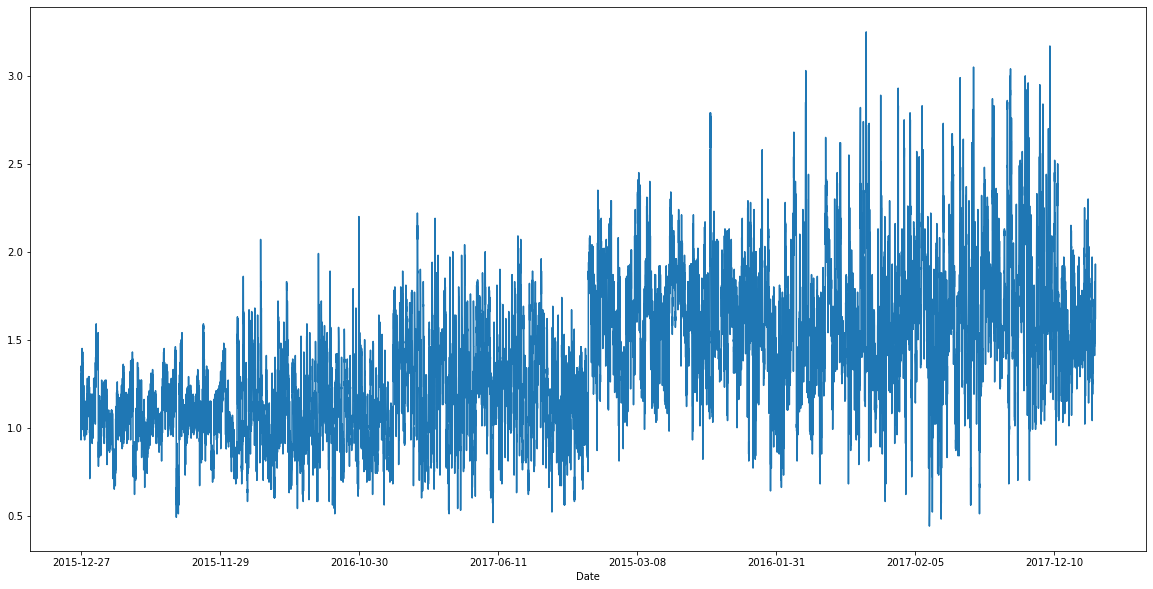

In [46]:
# Average Price by Date
df["AveragePrice"].plot(figsize = (20,10))

mean_value = df["AveragePrice"].mean()

print(f"The mean (average) global avocado price is: {mean_value} dollars") # Using fstrings